# Proposta de Resolução da Primeira Lista de Exercícios, por Mateus de Assis Silva

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import cv2
from google.colab.patches import cv2_imshow

## Questão 2

In [61]:
imagem_2 = np.zeros((9,9))
for i in range(0,9):
  for j in range(0,9):
    if i in range(2,7) and j in range(2,7):
      imagem_2[i,j]=1

imagem_2      

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [62]:
mascara_2 = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
mascara_2

array([[-1,  0,  1],
       [-1,  0,  1],
       [-1,  0,  1]])

In [63]:
signal.convolve2d(imagem_2,mascara_2,'same')

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1., -1.,  0.,  0.,  0.,  1.,  1.,  0.],
       [ 0., -2., -2.,  0.,  0.,  0.,  2.,  2.,  0.],
       [ 0., -3., -3.,  0.,  0.,  0.,  3.,  3.,  0.],
       [ 0., -3., -3.,  0.,  0.,  0.,  3.,  3.,  0.],
       [ 0., -3., -3.,  0.,  0.,  0.,  3.,  3.,  0.],
       [ 0., -2., -2.,  0.,  0.,  0.,  2.,  2.,  0.],
       [ 0., -1., -1.,  0.,  0.,  0.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Note os números negativos na metade esquerda da matriz. Isso ocorre porque no momento da convolução a matriz é invertida em ambos eixos. Isto é, a matriz resultante é a seguinte:

$ \begin{bmatrix} 1 & 0 & -1\\ 1 & 0 & -1\\ 1 & 0 & -1\\ \end{bmatrix}$

## Questão 3

Como premissa inicial considere que a imagem digital em questão se encontra em tons de cinza (imagem cinzenta, não colorida). Assuma também que o fundo é apresentado com tom claro (branco) e os objetos que compõem a figura são apresentados no tom preto.

(a) De forma a remover os objetos que tocam a margem da figura, executa-se uma varredura sobre os pixels que compõem perímetro da imagem. Caso algum pixel encontrado tenha tom escuro, executa-se o algoritmo ```floodfill``` com semente igual ao valor do maior tom de brilho. Isso fará com que os objetos que tocam a margem sejam mesclados ao fundo da cena. Essa imagem de saída será denominada ```imagem_sem_borda```.

(b) De forma a realizar a contagem dos objetos que se encontram na figura, pode-se executar uma varredura linha-a-linha, partindo do topo esquerdo da imagem até se atingir o canto inferior direito. Também deve-se iniciar uma variável que chamaremos ```contador_de_objetos```. Para cada pixel varrido, compara-se seu valor com o menor tom possível. Caso o retorno dessa comparação seja verdadeiro, incrementa-se o valor da variável   ```contador_de_objetos``` e realiza-se o algoritmo ```floodfill``` com semente igual ao valor dessa variável. Isso permitirá a contagem de objetos até o maior valor de tom cinza menos um. A imagem resultado será denominada ```imagem_contada```.

(c) Como medida de área de objeto, podemos contar quantos pixels compõem o mencionado objeto. Para tanto, define-se um vetor denominado ```vetor_de_areas``` com tantas posiçõesquanto objetos encontrados anteriormente. Varre-se a imagem linha a linha, partindo-se do topo esquerdo até ancançar-se o canto inferior direito. Checa-se o valor de cada pixel, e dependendo de tal quantidade, incrementa-se o respectivo valor no ```vetor_de_areas``` (note que ignora-se valores que correspondem ao fundo ou a 0). Ao fim do processamento, tem-se as áreas de cada objeto.

(d) Para podermos diferenciar um círculo de um quadrado de um triângulo, será necessário, em primeiro lugar, aferir um valor de perímetro para os objetos presentes na figura. Para podermos realizar a medição de tais valores, basta iterar sobre a imagem, mais uma vez, e, ao encontrar um pixel de uma figura, percorrer o trajeto ao redor da imagem, contando quantos pixels que pertencem a imagem tocam o fundo. 

Concluída tal etapa, temos, para cada objeto encontrado,suas áreas e perímetros. Assim, basta computar a razão entre o quadrado do perímetro e a área. Note que, para um quadrado, esse número equivale a 16, enquanto que para um círculo , esse valor se aproxima de 12.57 (4 vezes o valor de pi). Caso não se aproxime de nenhum desses valores, atribui-se ao objeto o rótulo "triângulo".

(e) Para identificar as posições dos objetos, itera-se sobre a imagem, partindo do topo esquerdo até se atingir o canto inferior direito. Atingindo-se algum pixel que compõe um objeto, registra-se aquela posição (que vem a ser a posição do objeto) e aplica-se o algoritmo ```floodfill``` com semente igual ao valor do maior tom de brilho (mesclando, assim, o objeto ao fundo da imagem). Ao final teremos, como posição dos objetos, o pixel do canto superior esquerdo da figura.

## Questão 4

Vou [importar a imagem](https://stackoverflow.com/questions/49186905/loading-images-in-google-colab) do quadrado que cortei lá da lista. Pra fazer o download dela, [clique aqui](https://github.com/mtxslv/dca0445_dip/blob/master/lista_periodo_2020_6/imagens/quadrado_q4.png). Abaixo importo e passo ao processamento:

In [64]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving quadrado_q4.png to quadrado_q4 (1).png
User uploaded file "quadrado_q4.png" with length 655 bytes


In [125]:
imagem_q4 = cv2.imread("quadrado_q4.png",cv2.IMREAD_GRAYSCALE)
print("Image Dimensions = ", imagem_q4.shape)

Image Dimensions =  (157, 157)


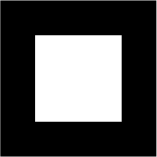

In [126]:
cv2_imshow(imagem_q4)

In [127]:
type(imagem_q4)

numpy.ndarray

Agora que já vimos a imagem, [apliquemos o Sobel](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html). Caso queira saber mais, [clique aqui](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gacea54f142e81b6758cb6f375ce782c8d).

In [128]:
sobel_y = cv2.Sobel(imagem_q4,cv2.CV_64F,1,0,ksize=3)
sobel_x = cv2.Sobel(imagem_q4,cv2.CV_64F,0,1,ksize=3)

Na letra a queremos o [campo vetorial](https://stackoverflow.com/questions/30079740/image-gradient-vector-field-in-python):

In [163]:
X,Y = np.meshgrid(np.linspace(0,1,157),np.linspace(0,1,157))

[agora é só plotar](https://krajit.github.io/sympy/vectorFields/vectorFields.html)

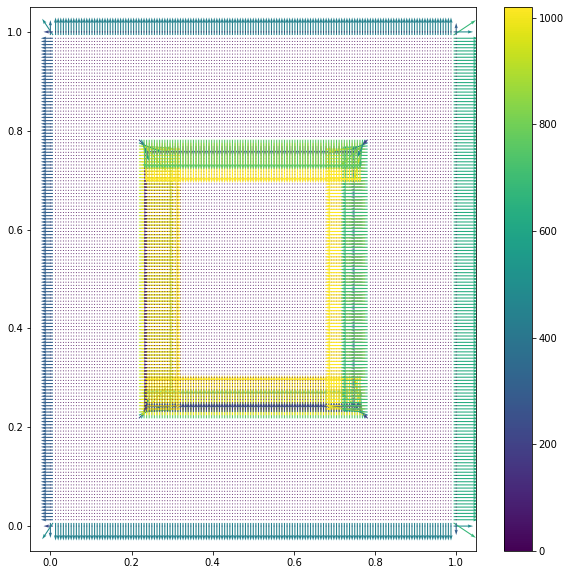

In [188]:
M = np.hypot(sobel_x, sobel_y)
plt.figure(1,figsize=(10,10))
fig = plt.quiver(X, Y, sobel_y, sobel_x, M)
cb = plt.colorbar(fig)

E na letra b pede-se o campo magnitude do gradiente:

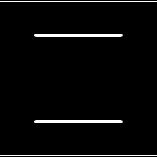

In [129]:
cv2_imshow(np.abs(sobel_x))

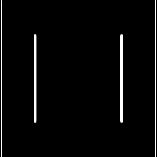

In [130]:
cv2_imshow(np.abs(sobel_y))

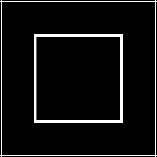

In [189]:
cv2_imshow(np.abs(sobel_x)+np.abs(sobel_y))

## Questão 5

In [134]:
matriz = np.array([[0,5,7,7,5,8,7,8],
                   [7,2,6,2,6,5,6,8],
                   [6,9,7,7,0,7,2,7],
                   [6,6,1,7,6,7,7,5],
                   [9,6,0,7,8,2,6,7],
                   [2,8,8,2,7,6,7,8],
                   [7,3,2,6,1,7,5,8],
                   [9,9,5,6,7,7,7,7]])
matriz

array([[0, 5, 7, 7, 5, 8, 7, 8],
       [7, 2, 6, 2, 6, 5, 6, 8],
       [6, 9, 7, 7, 0, 7, 2, 7],
       [6, 6, 1, 7, 6, 7, 7, 5],
       [9, 6, 0, 7, 8, 2, 6, 7],
       [2, 8, 8, 2, 7, 6, 7, 8],
       [7, 3, 2, 6, 1, 7, 5, 8],
       [9, 9, 5, 6, 7, 7, 7, 7]])

<BarContainer object of 10 artists>

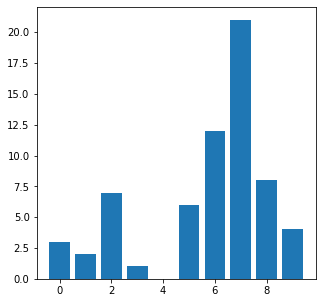

In [135]:
# (b)
histogram_vector,bin_edges = np.histogram(matriz)
plt.bar(np.arange(0,10),histogram_vector)

<BarContainer object of 10 artists>

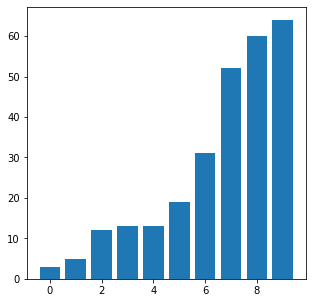

In [136]:
#(c)
cumulative_histogram = np.cumsum(histogram_vector)
plt.bar(np.arange(0,10),cumulative_histogram)

In [137]:
def mapeamento_cum_hist(matriz_recebida,histograma_acumulado):
  linhas,colunas = np.shape(matriz_recebida)
  matriz_cum_hist = np.zeros((linhas,colunas))
  for i in range(0,linhas):
    for j in range(0,colunas):
      matriz_cum_hist[i,j]=histograma_acumulado[matriz_recebida[i,j]]
  return np.amax(matriz_recebida)*np.round(matriz_cum_hist/(linhas*colunas),1)

In [138]:
mapeamento_cum_hist(matriz, cumulative_histogram)

array([[0. , 2.7, 7.2, 7.2, 2.7, 8.1, 7.2, 8.1],
       [7.2, 1.8, 4.5, 1.8, 4.5, 2.7, 4.5, 8.1],
       [4.5, 9. , 7.2, 7.2, 0. , 7.2, 1.8, 7.2],
       [4.5, 4.5, 0.9, 7.2, 4.5, 7.2, 7.2, 2.7],
       [9. , 4.5, 0. , 7.2, 8.1, 1.8, 4.5, 7.2],
       [1.8, 8.1, 8.1, 1.8, 7.2, 4.5, 7.2, 8.1],
       [7.2, 1.8, 1.8, 4.5, 0.9, 7.2, 2.7, 8.1],
       [9. , 9. , 2.7, 4.5, 7.2, 7.2, 7.2, 7.2]])

(c) A equalização de histogramas é adequada para facilitar a compreensão de imagens com brilho saturado (muito escuras ou muito claras). Caso esteja se tratando desse caso, o resultado será bastante útil; caso não seja esse o problema, o processamento pode ser inútil.

## Questão 8 


Tal sistema de captura invariavelmente necessitará de dois processamentos principais: suavização de ruído a partir de média de imagens e aplicação de pseudo-cor para realçar detalhes desejados.

Em primeiro lugar, sana-se o ruído: captura-se uma quantidade de imagens e realiza-se a média pixel-a-pixel. O número de matrizes utilizadas para atenuar o ruído deve ser determinado empiricamente. Vale saber que tal processo só seria efetivo se o ruído seguir uma distribuição gaussiana. Caso seja notado que o ruído possui outra distribuição, deve-se utilizar outra medida estatística: mediana, por exemplo.

Por fim, escolhe-se um mapeamento de pseudo-cor empiricamente, baseado nas características que se deseja realçar.

## Questão 9

Em primeiro lugar, remove-se as bolhas que estão tocando a bordada imagem ao varrer o perímetro da imagem e aplicar o algoritmo ```floodfill``` com semente igual a itensidade do tom de cinza do fundo da cena.

Para concluir o processo que irá produzir a imagem que só terá bolhas isoladas, devemos estimar a área de uma bolha isolada. Pode-se recortar um trecho retangular da imagem que possui uma bolha isolada e executar uma estimativa de área baseada na quantidade de pixels que compõem a figura, para realizar-se tal estimativa.

Por fim, itera-se a imagem cujas bolhas marginais já foram removidas, partindo do topo esquerdo até atingir o canto inferior direito. Caso se encontre um pixel que compõe um objeto, mede-se a área da figura em _foreground_, e caso ela não seja igual a estimativa da área da bolha isolada, aplica-se ```floodfill``` cuja semente é o valor do tom de cinza que compõe o fundo. 

Ao fim desse processo haverá a imagem cujas bolhas estão isoladas e não tocam a margem.

## Questão 10

(a) Ao se zerar os bits menos significativos, todas as colunas do histograma relativas a valores ímpares seriam zeradas, e os valores que lá foram registradas seriam adicionadas nas colunas imediatamente a esquerda (isto é, seriam adicionadas aos valores pares imediatamente menores).

(b) Ao se zerar os bits mais significativos, as colunas do histograma relativas à metade maior de intensidades (itensidade 2 elevado a 4 até itensidade 2 elevado a 7) seriam zeradas e seus valores seriam redistribuídos na metade menor de itensidades (itensidade 2 elevado a 0 até itensidade 2 elevado a 3). Por exemplo, se houveram, inicialmente, 11 pixels com itensidade 10000001 (itensidade 129) e 7 pixels com itensidade 00000001 (itensidade 1), haverão, ao fim do procedimento, 0 pixels com itensidade 129 e 11+7=18 pixels com itensidade 01. 

## Questão 11

1. Máximo Acima de Limiar
2. Detector de Bordas de Sobel
3. Filtro de Aguçamento
4. Filtro da Mediana
5. Equalização
6. Filtro da Média
7. Detector de Bordas de Sobel
8. Transformação de Brilho



## Questão 12

Existem 3 intensidade: _r1_, _r2_ e _r3_. Note que o contagem de cada intensidade é igual à área com cada itensidade. Definamos um vetor que determinará o histograma: 

In [139]:
histogram_q12 = np.zeros([3])
histogram_q12

array([0., 0., 0.])

A intensidade _r2_ possui como histograma:

In [140]:
histogram_q12[1] = np.power(175-144,2)

A intensidade _r3_ possui como histograma:

In [141]:
histogram_q12[2] = np.power(191-128,2) - histogram_q12[1]

A intensidade _r1_ possui como intensidade:

In [142]:
histogram_q12[0] = np.power(256,2) - histogram_q12[1] - histogram_q12[2]

Eis o nosso vetor:

In [143]:
histogram_q12

array([61567.,   961.,  3008.])

<BarContainer object of 3 artists>

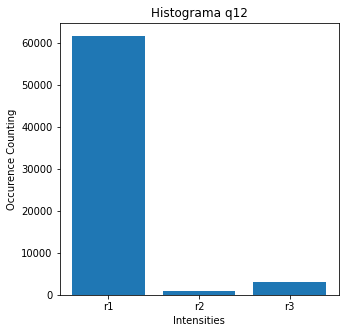

In [144]:
plt.title("Histograma q12")
plt.ylabel("Occurence Counting")
plt.xlabel("Intensities")
plt.bar([0,1,2],histogram_q12, tick_label = ("r1","r2","r3"))

Agora vamos equalizar:

In [145]:
cum_hist = np.cumsum(histogram_q12)
cum_hist

array([61567., 62528., 65536.])

<BarContainer object of 3 artists>

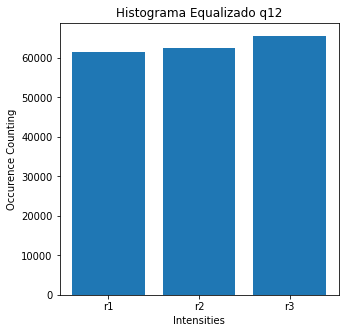

In [146]:
plt.title("Histograma Equalizado q12")
plt.ylabel("Occurence Counting")
plt.xlabel("Intensities")
plt.bar([0,1,2],cum_hist, tick_label = ("r1","r2","r3"))

## Questão 14

Para que o procedimento seja realizado corretamente, é necessário que a iluminação não tenha variado entre a aquisição da figura padrão e a figura das peças analizadas.

Também é necessário que a posição (cartesiana e angular) das peças não haja variado.

## Questão 15

In [190]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving quadrado_q15.png to quadrado_q15.png
User uploaded file "quadrado_q15.png" with length 1563 bytes


In [193]:
imagem_q15 = cv2.imread("quadrado_q15.png",cv2.IMREAD_GRAYSCALE)
print("Image Dimensions = ", imagem_q15.shape)

Image Dimensions =  (214, 214)


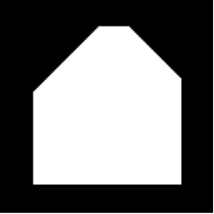

In [194]:
cv2_imshow(imagem_q15)

In [195]:
sobel_y_q15 = cv2.Sobel(imagem_q15,cv2.CV_64F,1,0,ksize=3)
sobel_x_q15 = cv2.Sobel(imagem_q15,cv2.CV_64F,0,1,ksize=3)

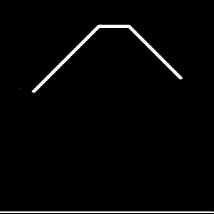

In [200]:
cv2_imshow(sobel_x_q15)

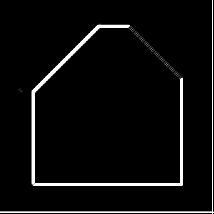

In [203]:
cv2_imshow(np.abs(sobel_y_q15+sobel_x_q15))

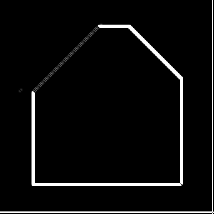

In [204]:
cv2_imshow(np.abs(-sobel_y_q15+sobel_x_q15))

a. Aplicou-se as máscaras de filtro de sobel em x e y. Por fim, somou-se o valor absoluto dos resultados. 

b. Aplicou-se as máscaras de filtro de sobel em x e y. Por fim, somou-se os resultados.

c. Aplicou-se as máscaras de filtro de sobel em x e y. Por fim, subtraiu-se o resultado do filtro de sobel em y do resultado do filtro de sobel em x.

d. Aplicou-se a máscara do filtro de sobel em x (direção vertical).
